# Homework 6 (distributions, statistical error, and scatter plots)

For this homework assignment you are required to use Python (pandas, matplotlib, and seaborn) to do the exercises. Please write your own code and provide your code along with your responses to the questions.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Climate Data

For this assignment we will continue visualizing the Delhi, India climate data set.
* To get started, load the climate data provided on Canvas
* Data source:  https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data


In [2]:
df_temps = pd.read_csv("DailyDelhiClimateTrain.csv")
df_temps.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Problem 1 (1.5 points)

First, create a new column in `df_temps` that contains the name of the month ("January", "February", etc.) of the date for each row. Then visualize the average temperatures recorded in January in two ways:
* Plot a density curve
* Make a scatter plot (plot temperature along the x-axis, and use "jittering" to spread out the dots vertically)

For the jittering, you may create your own randomness (e.g. sample from a uniform distribution), or use a built-in solution (e.g. seaborn stripplot -- https://seaborn.pydata.org/generated/seaborn.stripplot.html )

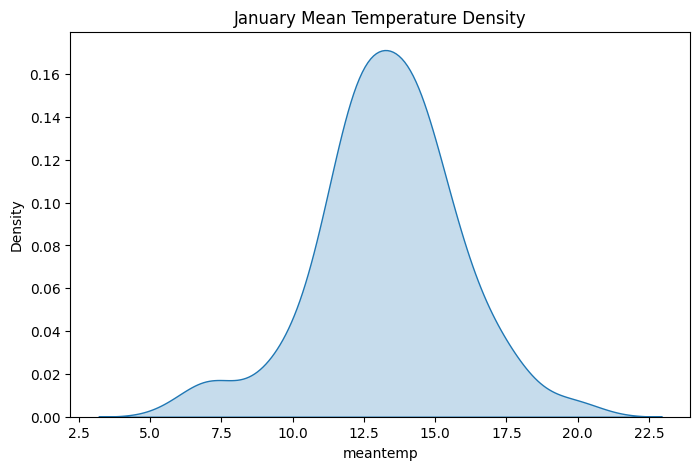

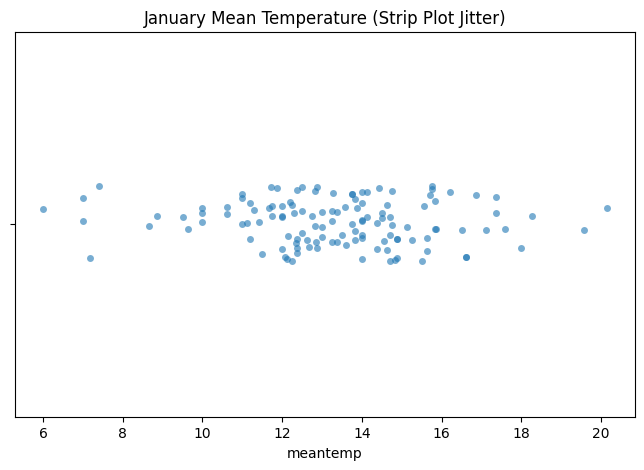

In [6]:
# Your answer here
# Convert the 'date' column to datetime objects
df_temps['date'] = pd.to_datetime(df_temps['date'])

# Create a new column that contains the full month name
df_temps['month'] = df_temps['date'].dt.month_name()

# Filter the dataframe to include only rows for January
df_jan = df_temps[df_temps['month'] == 'January']

# Plot a density curve of the January 'meantemp'
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_jan, x='meantemp', fill=True)
plt.title('January Mean Temperature Density')
plt.xlabel('meantemp')
plt.ylabel('Density')
plt.show()

# Using seaborn.stripplot for jitter on the same plot
plt.figure(figsize=(8,5))
sns.stripplot(data=df_jan, x='meantemp', jitter=True, alpha=0.6)
plt.title('January Mean Temperature (Strip Plot Jitter)')
plt.xlabel('meantemp')
plt.show()

<Axes: xlabel='meantemp', ylabel='Density'>

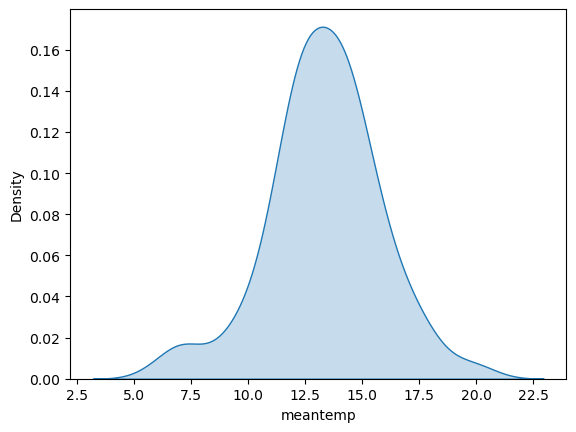

<Axes: xlabel='meantemp'>

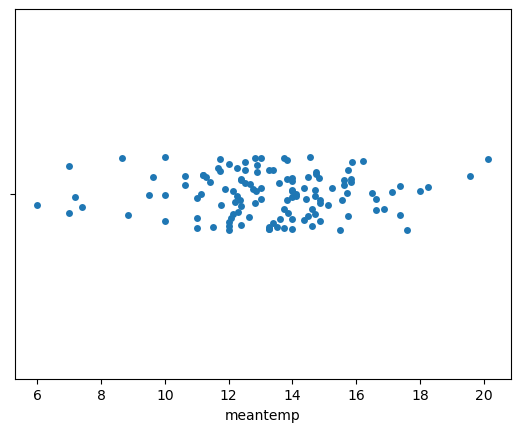

### Problem 2 (1.5 points)

**(a)** Now combine these charts together to **make it rain!**
* Plot the density curve, and place the scatter plot underneath
  * Remove excess vertical whitespace between them, if necessary
* Include the shading under the density curve
* Remove all axis lines and units for the moment
* Adjust the `alpha` value on the scatter plot so that there is some transparency between overlapping dots (alpha = 0.7 seems to work well)
* **Be sure to use the same x-axis limits on both charts!**

<ipython-input-45-c079fc8bd6a8>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=0)


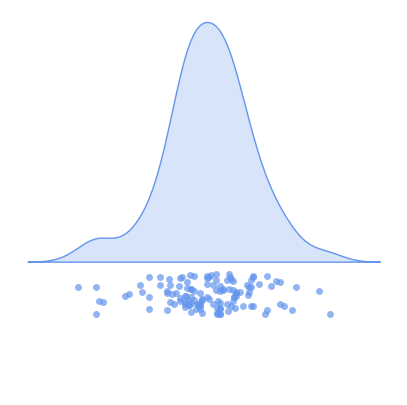

In [45]:
# --- Sample data ---
df_temps['date'] = pd.to_datetime(df_temps['date'])
df_temps['month'] = df_temps['date'].dt.month_name()
df_jan = df_temps[df_temps['month'] == 'January']

# -- Figure with two subplots sharing x-axis --
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(5, 5),
    gridspec_kw={
        "height_ratios": [1, 0.8],  # top is bigger, bottom is smaller
        "hspace": -0.3                # no extra space between subplots
    }
)

# -- Top: KDE curve --
sns.kdeplot(data=df_jan, x="meantemp", fill=True, ax=ax_top, color="cornflowerblue")
ax_top.set_ylim(bottom=0)
ax_top.axis("off")  # remove all spines/ticks/labels for a clean look

# -- Bottom: Jitter scatter (strip) --
sns.stripplot(data=df_jan, x="meantemp", jitter=True, alpha=0.7,
              color="cornflowerblue", ax=ax_bottom)
ax_bottom.axis("off")  # remove spines/ticks/labels here too

# Optionally, tighten layout further:
plt.tight_layout(h_pad=0)
plt.show()

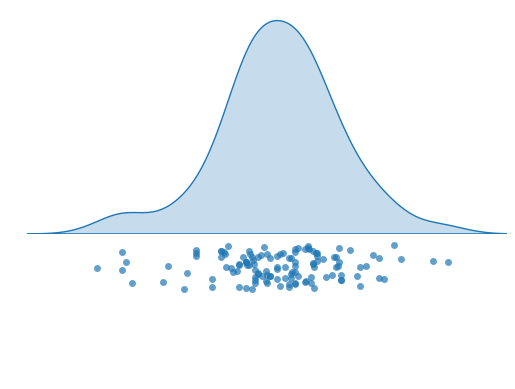

**(b)** Now let's do a little more design:
* Use a vertical line to show the mean temperature for January
* Color both charts using `coolwarm` color palette
  * Set 0 as low and 40 as high
  * Use the mean value / 40 as the fraction for the color palette
  
**Note**:  
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html uses proportions for its boundary values (0 is min, 1 is max)
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.vlines.html#matplotlib.axes.Axes.vlines uses data coordinates


<ipython-input-47-fd7a978a37ab>:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=0)


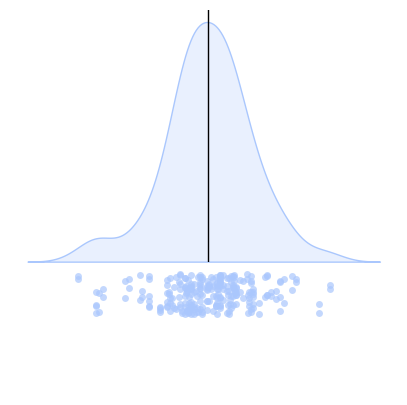

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- 1. Calculate mean temperature and compute fraction for coolwarm colormap ---
mean_jan = df_jan["meantemp"].mean()
# We treat 0 as 'low' and 40 as 'high', so fraction = mean_jan / 40
fraction = np.clip(mean_jan / 40, 0, 1)  # clamp just in case
# Convert fraction to an actual color from 'coolwarm'
cmap = sns.color_palette("coolwarm", as_cmap=True)
line_color = mcolors.to_hex(cmap(fraction))

# -- Figure with two subplots sharing x-axis --
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(5, 5),
    gridspec_kw={
        "height_ratios": [1, 0.8],  # top is bigger, bottom is smaller
        "hspace": -0.3                # no extra space between subplots
    }
)

# -- Top: KDE curve --
sns.kdeplot(data=df_jan, x="meantemp", fill=True, ax=ax_top, color=line_color)
ax_top.set_ylim(bottom=0)
ax_top.axis("off")  # remove all spines/ticks/labels for a clean look

# -- Bottom: Jitter scatter (strip) --
sns.stripplot(data=df_jan, x="meantemp", jitter=True, alpha=0.7,
              color=line_color, ax=ax_bottom)
ax_bottom.axis("off")  # remove spines/ticks/labels here too

# --- 4(b). Draw vertical line at the mean temperature
ax_top.axvline(
    x=mean_jan,
    color="black",
    linewidth=1,
    zorder=2  # bring the line above the density shading
)

# --- 5(c). Plot strip (jitter) below ---
sns.stripplot(
    data=df_jan, x="meantemp",
    jitter=True, alpha=0.7,
    color=line_color,
    ax=ax_bottom
)

# --- 6. Remove spines, ticks, and labels for a clean look ---
for ax in (ax_top, ax_bottom):
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Tighten layout
plt.tight_layout(h_pad=0)

plt.show()

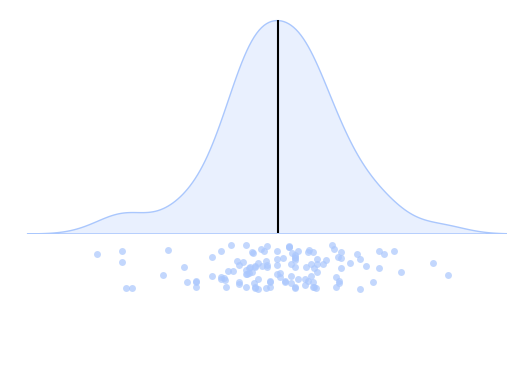

### Problem 3 (4 points)

Use the previous problem to show temperature averages across all months:
* Create 12 raincloud charts, 1 per month, and stack them vertically
* Use the same low and high temperature on each chart (ranges from about 3 to about 42)
* Use the same y-axis values on each density curve
* Color each individual month according to the `coolwarm` color palette
  * Use the mean temperature value for each month
  * Compute the range of average temperatures to use as your interval (lowest average should map to about 0, and highest average should map to about 1)
* Include the mean temperature line on each density curve
  
Additional design elements:
* Get rid of any extraneous legends, axis lines, box lines (spines), etc.
* Plot a grid line at 0 for each density curve
* Label the months on each chart
* Get rid of excess vertical whitespace
* Show units on x-axis once at the bottom of the figure
* Create a figure title

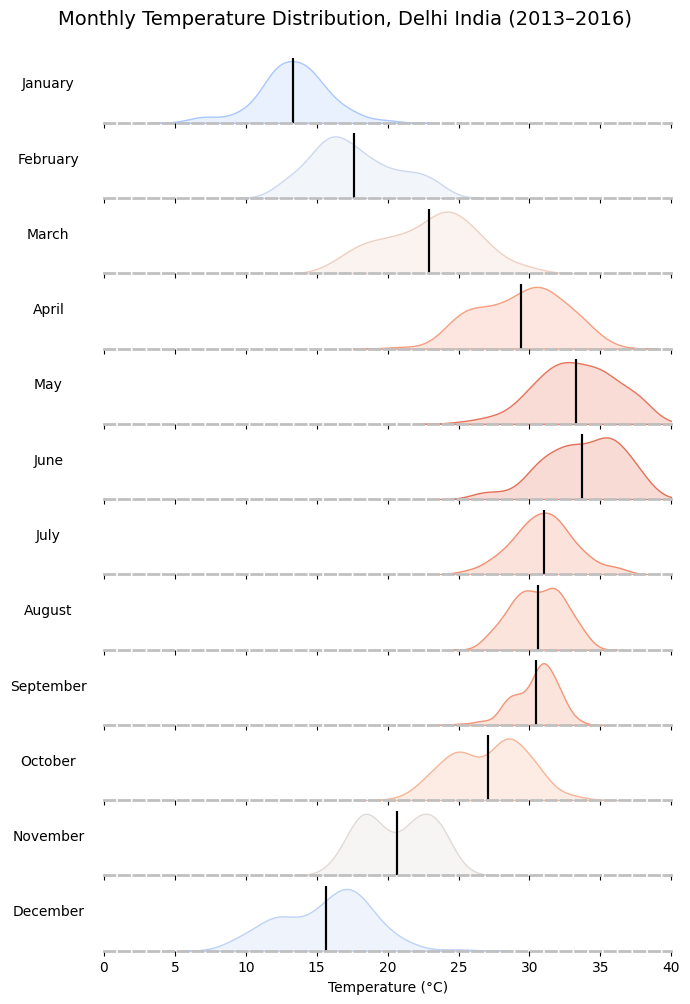

In [85]:


# 1. Create a list of months in order
months_in_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# 3. Set up figure with 12 subplots, one per month
fig, axes = plt.subplots(
    nrows=12, ncols=1,
    sharex=True,        # all share the same x-axis scale
    figsize=(7, 10)     # adjust as desired for readability
)

# 4. Loop through each month and plot
#    We'll index from 0..11, so month i corresponds to axes[i].
for i, month in enumerate(months_in_order):
    # Extract just the data for this month
    df_m = df_temps[df_temps["month_name"] == month]
    if df_m.empty:
        continue  # skip any month with no data

    # Compute the mean temperature and map it to [0,1] for coolwarm
    mean_temp = df_m["meantemp"].mean()
    frac = np.clip(mean_temp / 40.0, 0, 1)  # clamp fraction for safety
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    month_color = mcolors.to_hex(cmap(frac))

    # Plot the kernel density
    sns.kdeplot(
        data=df_m,
        x="meantemp",
        fill=True,
        color=month_color,
        ax=axes[i]
    )

    # Draw a vertical line for the mean
    axes[i].axvline(
        x=mean_temp,
        color="black",
        linestyle="-",
        linewidth=1.5
    )
    # Vertical line at mean
    axes[i].axvline(mean_temp, color="black", linestyle="-", linewidth=1.5)

    # Fix x-limits
    axes[i].set_xlim(0, 40)

    # Label the month on the Y-axis (optional)
    axes[i].set_ylabel(month, rotation=0, labelpad=40)

    # Remove left/right/top spines; style the bottom spine
    axes[i].spines["left"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

    # Make the bottom spine a dotted gray line
    axes[i].spines["bottom"].set_visible(True)
    axes[i].spines["bottom"].set_linestyle("--")  # dotted line
    axes[i].spines["bottom"].set_color("silver")
    axes[i].spines["bottom"].set_linewidth(2.0)

    # Hide y-axis tick marks and labels
    axes[i].tick_params(left=False, labelleft=False)

    # Only show x-axis labels on the last subplot
    if i < 11:
        axes[i].tick_params(labelbottom=False)
    else:
        axes[i].set_xlabel("Temperature (°C)")

# 6. Add a main title
fig.suptitle("Monthly Temperature Distribution, Delhi India (2013–2016)", y=1, fontsize=14)

# 7. Adjust spacing to reduce blank space between subplots
plt.tight_layout(h_pad=0.4)

plt.show()

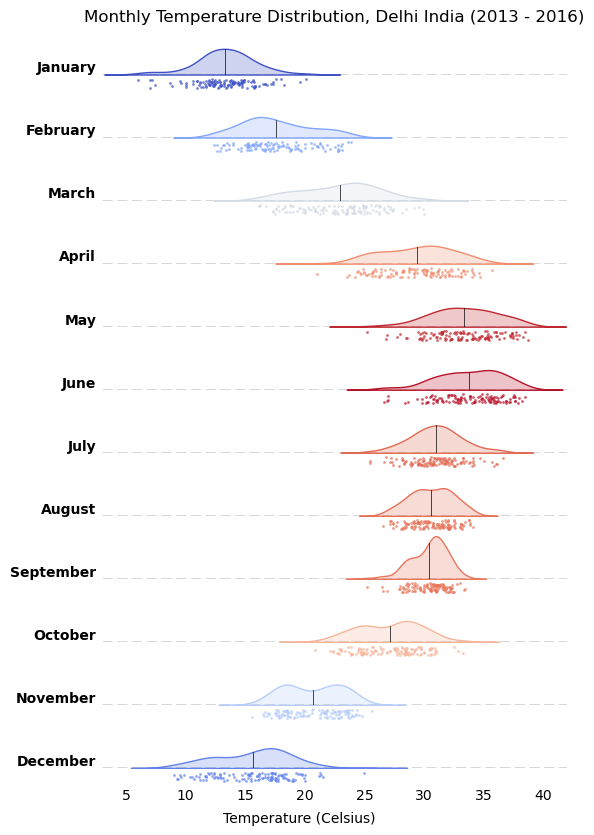

### Problem 4 (3 points)

Let's go back to the original data frame:

In [60]:
df_temps.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,month_num,month_name
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,January,1,January
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,January,1,January
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,January,1,January
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,January,1,January
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,January,1,January


**(a)** Create a scatter plot to plot `meantemp` against `humidity`. Include a line of best fit:
*  https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

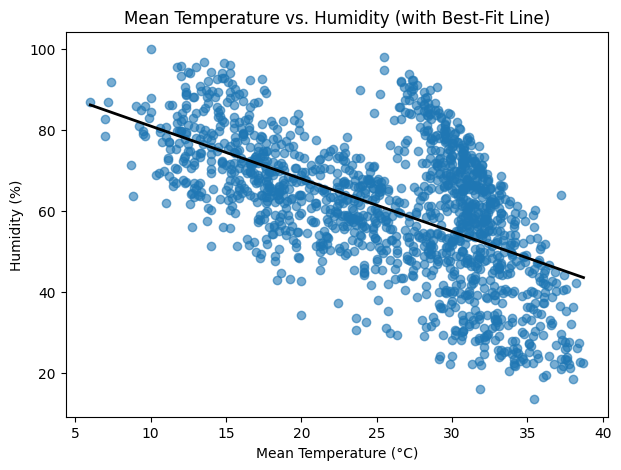

In [70]:
# 1. Select the x and y values for the scatter plot
y = df_temps['humidity']
x = df_temps['meantemp']

# 2. Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Mean Temperature vs. Humidity (with Best-Fit Line)")

# 3. Compute the best-fit line (linear: degree=1)
coeffs = np.polyfit(x, y, deg=1)
m, b = coeffs  # slope, intercept

# 4. Generate points on the line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# 5. Plot the best-fit line
plt.plot(x_line, y_line, color="black", linewidth=2, label=f"y = {m:.2f}x + {b:.2f}")

plt.show()

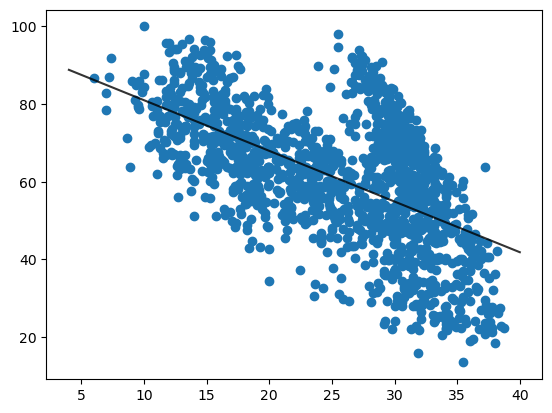

**(b)** Update the scatter plot by coloring dots by season:
* Use December, January, February as winter
* Use March, April, May as spring
* Use June, July, August as summer
* Use September, October, November as fall

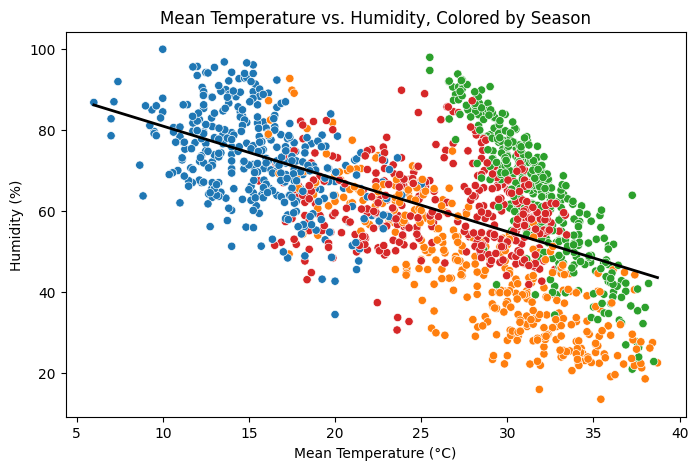

In [84]:
df_temps["date"] = pd.to_datetime(df_temps["date"])
df_temps["month_name"] = df_temps["date"].dt.month_name()

# 2. Define season mapping
winter = ["December", "January", "February"]
spring = ["March", "April", "May"]
summer = ["June", "July", "August"]
fall   = ["September", "October", "November"]

def map_month_to_season(m):
    if m in winter:
        return "Winter"
    elif m in spring:
        return "Spring"
    elif m in summer:
        return "Summer"
    elif m in fall:
        return "Fall"
    else:
        return np.nan  # Just in case

df_temps["season"] = df_temps["month_name"].apply(map_month_to_season)

# 3. Extract humidity (x) and meantemp (y)
y = df_temps["humidity"]
x = df_temps["meantemp"]

# 4. Compute best-fit line across all data
m, b = np.polyfit(x, y, deg=1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# 5. Plot scatter colored by season
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_temps, y="humidity", x="meantemp",
                hue="season", palette="tab10", legend=False)

# 6. Add best-fit line
plt.plot(x_line, y_line, color="black", linewidth=2, label=f"Best-fit: y={m:.2f}x+{b:.2f}")

# 7. Labels & legend
plt.ylabel("Humidity (%)")
plt.xlabel("Mean Temperature (°C)")
plt.title("Mean Temperature vs. Humidity, Colored by Season")

plt.show()

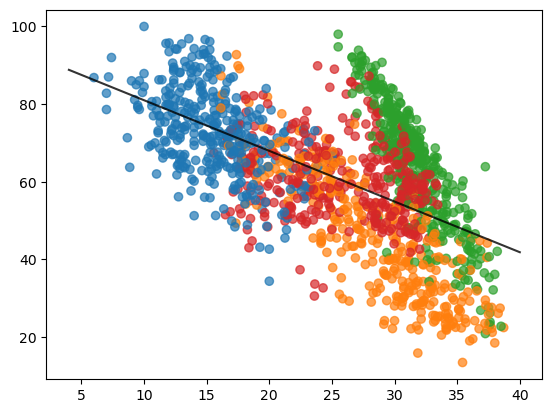

**(c)** Finally, split the scatter plot into 4 individual charts:
* Use a 2x2 grid, with one chart per season
* Label the season for each individual chart
* Use the same x and y coordinate ranges on each chart
* Include an individual line of best fit for each chart


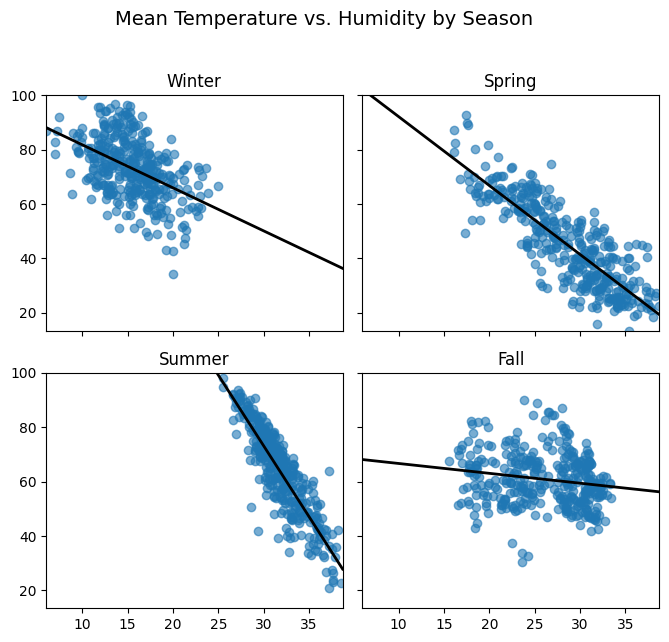

In [103]:
df_temps["season"] = df_temps["month_name"].apply(map_month_to_season)
df_temps = df_temps.dropna(subset=["season"])  # remove rows w/o a valid season

# 2. Create a 2×2 grid for the four seasons
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
axes = axes.ravel()  # flatten to a 1D list of 4 Axes objects

seasons = ["Winter", "Spring", "Summer", "Fall"]

# (Optional) Decide on uniform x/y ranges so all plots match
# Adjust based on your data range if you like
x_min, x_max = df_temps["meantemp"].min(), df_temps["meantemp"].max()
y_min, y_max = df_temps["humidity"].min(), df_temps["humidity"].max()

for i, season in enumerate(seasons):
    ax = axes[i]

    # 2a. Filter the data for this season
    df_s = df_temps[df_temps["season"] == season]
    x = df_s["meantemp"]
    y = df_s["humidity"]

    # 2b. Scatter plot
    ax.scatter(x, y, alpha=0.6)

    # 2c. Compute & plot a best-fit line if at least 2 points
    if len(df_s) >= 2:
        m, b = np.polyfit(x, y, 1)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = m * x_line + b
        ax.plot(x_line, y_line, color="black", linewidth=2)

    # 2d. Set title, axis limits, etc.
    ax.set_title(season)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# 4. Overall title (optional)
fig.suptitle("Mean Temperature vs. Humidity by Season", fontsize=14, y=0.95)

plt.tight_layout(rect=[0.03, 0.04, 1, 0.93])
plt.show()


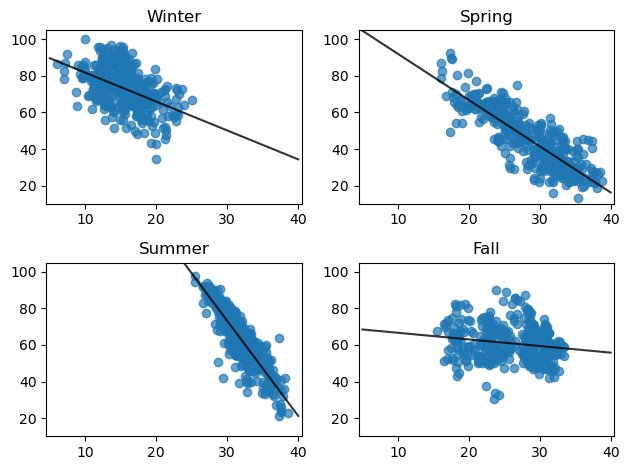